<a href="https://colab.research.google.com/github/abakamousa/NLP-Classifier-for-Spam-detection/blob/main/Spam_filter_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spam detection using NLP**

Import librairies

In [2]:
#Install missing librairies
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import nltk
import string 
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.ensemble                import RandomForestClassifier
from sklearn.metrics                 import precision_recall_fscore_support as score
from sklearn.metrics                 import accuracy_score as acs
from sklearn.metrics                 import confusion_matrix
from wordcloud                       import WordCloud
from wordcloud                       import STOPWORDS
from wordcloud                       import ImageColorGenerator
from sklearn.model_selection         import train_test_split
from nltk.tokenize                   import RegexpTokenizer
from nltk.stem.snowball              import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus                     import stopwords
from nltk.stem                       import WordNetLemmatizer
from google.colab                    import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#nltk.download()

1.   **Functions**

In [24]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [5]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]   

 

2.   **Data preparation**



In [6]:
path = "/content/drive/MyDrive/NLP/SMSSpamCollection.tsv"
data = pd.read_csv(path, sep='\t', names=['label', 'text'], header=None)

In [7]:
data.tail(10)

,label,text
5558,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5559,ham,Ard 6 like dat lor.
5560,ham,Why don't you wait 'til at least wednesday to ...
5561,ham,Huh y lei...
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...
5567,ham,Rofl. Its true to its name


### Remove punctuation

In [8]:

data['new_text'] = data['text'].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-8-4e10e079cdde>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['new_text'] = data['text'].str.replace('[{}]'.format(string.punctuation), '')


In [9]:
data.tail(10)

,label,text,new_text
5558,ham,Ok lor... Sony ericsson salesman... I ask shuh...,Ok lor Sony ericsson salesman I ask shuhui the...
5559,ham,Ard 6 like dat lor.,Ard 6 like dat lor
5560,ham,Why don't you wait 'til at least wednesday to ...,Why dont you wait til at least wednesday to se...
5561,ham,Huh y lei...,Huh y lei
5562,spam,REMINDER FROM O2: To get 2.50 pounds free call...,REMINDER FROM O2 To get 250 pounds free call c...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...
5567,ham,Rofl. Its true to its name,Rofl Its true to its name


### Tokenize

In [10]:
regexp = RegexpTokenizer('\w+')

data['text_token']=data['text'].apply(regexp.tokenize)



In [11]:
data['text_token'].head()

0    [I, ve, been, searching, for, the, right, word...
1    [Free, entry, in, 2, a, wkly, comp, to, win, F...
2    [Nah, I, don, t, think, he, goes, to, usf, he,...
3    [Even, my, brother, is, not, like, to, speak, ...
4           [I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]
Name: text_token, dtype: object

### Remove Stopword

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [14]:
# Remove stopwords
data['text_stop'] = data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [15]:
data.head()

,label,text,new_text,text_token,text_stop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[I, ve, been, searching, for, the, right, word...","[I, searching, right, words, thank, breather, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, don, t, think, he, goes, to, usf, he,...","[Nah, I, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"


### STEMMMING

Stemming is the process of producing morphological variants of a root/base word. 

In [16]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [17]:
data['stemmed'] = data['text_stop'].apply(lambda x: [stemmer.stem(y) for y in x])

In [18]:
data

,label,text,new_text,text_token,text_stop,stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[I, ve, been, searching, for, the, right, word...","[I, searching, right, words, thank, breather, ...","[i, search, right, word, thank, breather, i, p..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, don, t, think, he, goes, to, usf, he,...","[Nah, I, think, goes, usf, lives, around, though]","[nah, i, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]"
...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[This, 2nd, time, tried, 2, contact, u, U, 750...","[this, 2nd, time, tri, 2, contact, u, u, 750, ..."
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[Will, ü, b, going, esplanade, fr, home]","[will, ü, b, go, esplanad, fr, home]"
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, So, any, othe...","[Pity, mood, So, suggestions]","[piti, mood, so, suggest]"
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, intereste...","[the, guy, bitch, i, act, like, interest, buy,..."


### Lemmatize

In [19]:
wordnet_lem = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [20]:
data['text_lem'] = data['new_text'].apply(wordnet_lem.lemmatize)

In [21]:
data

,label,text,new_text,text_token,text_stop,stemmed,text_lem
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[I, ve, been, searching, for, the, right, word...","[I, searching, right, words, thank, breather, ...","[i, search, right, word, thank, breather, i, p...",Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...",Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, don, t, think, he, goes, to, usf, he,...","[Nah, I, think, goes, usf, lives, around, though]","[nah, i, think, goe, usf, live, around, though]",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[Even, my, brother, is, not, like, to, speak, ...","[Even, brother, like, speak, They, treat, like...","[even, brother, like, speak, they, treat, like...",Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[i, have, a, date, on, sunday, with, will]",I HAVE A DATE ON SUNDAY WITH WILL
...,...,...,...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[This, 2nd, time, tried, 2, contact, u, U, 750...","[this, 2nd, time, tri, 2, contact, u, u, 750, ...",This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?,Will ü b going to esplanade fr home,"[Will, ü, b, going, to, esplanade, fr, home]","[Will, ü, b, going, esplanade, fr, home]","[will, ü, b, go, esplanad, fr, home]",Will ü b going to esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[Pity, was, in, mood, for, that, So, any, othe...","[Pity, mood, So, suggestions]","[piti, mood, so, suggest]",Pity was in mood for that Soany other suggest...
5566,ham,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[The, guy, did, some, bitching, but, I, acted,...","[The, guy, bitching, I, acted, like, intereste...","[the, guy, bitch, i, act, like, interest, buy,...",The guy did some bitching but I acted like id ...


### Wordcloud

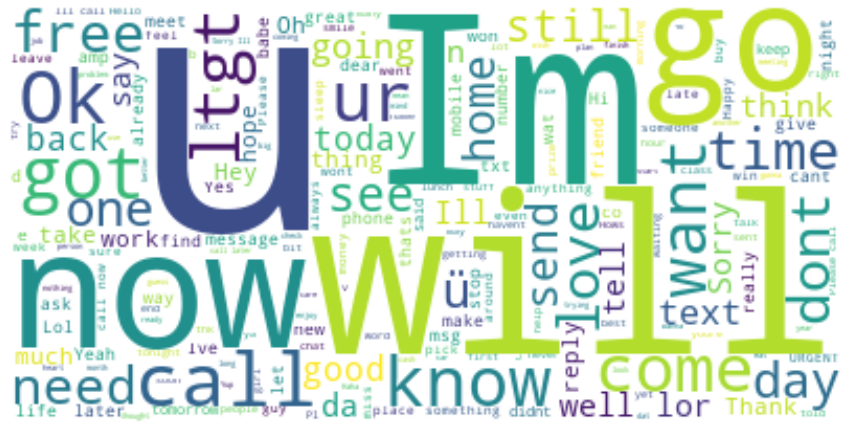

In [22]:
text_word = " ".join(i for i in data.new_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_word)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Feature creation

In [25]:
data['text_len'] = data['text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['text'].apply(lambda x: count_punct(x))

### Train test split

In [29]:
X=data[['text', 'text_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=123)

### Vectorize Data

Vectorization or word embedding is the process of converting text data to numerical vectors.

In [32]:
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(X_train['text'])


In [34]:
tfidf_train = tfidf_vect_fit.transform(X_train['text'])
tfidf_test = tfidf_vect_fit.transform(X_test['text'])

X_train_vect = pd.concat([X_train[['text_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['text_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,text_len,punct%,0,1,2,3,4,5,6,7,...,8041,8042,8043,8044,8045,8046,8047,8048,8049,8050
0,107,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,130,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




3.   **Random forest classifier**




In [39]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Precision: 1.0 / Recall: 0.792 / F1-Score: 0.884 / Accuracy: 0.97


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


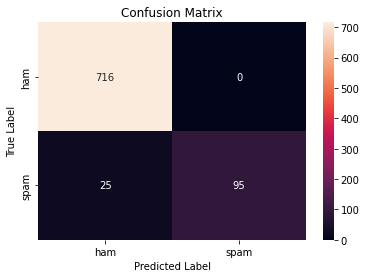

In [40]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()